# Modelo de classificação

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline

### link do dataset

https://www.kaggle.com/datasets/andrewmvd/fetal-health-classification?resource=download



Objetivo: Classificar a saúde fetal para prevenir a mortalidade infantil e materna.

Variável alvo(y): fetal_health
 1 = Normal
 2 = Suspect
 3 = Pathological

In [2]:
df = pd.read_csv(r'C:\Users\julio\Downloads\archive (12)\fetal_health.csv')

In [3]:
df.head()

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
0,120.0,0.000,0.0,0.000,0.000,0.0,0.0,73.0,0.5,43.0,...,62.0,126.0,2.0,0.0,120.0,137.0,121.0,73.0,1.0,2.0
1,132.0,0.006,0.0,0.006,0.003,0.0,0.0,17.0,2.1,0.0,...,68.0,198.0,6.0,1.0,141.0,136.0,140.0,12.0,0.0,1.0
2,133.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.1,0.0,...,68.0,198.0,5.0,1.0,141.0,135.0,138.0,13.0,0.0,1.0
3,134.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,11.0,0.0,137.0,134.0,137.0,13.0,1.0,1.0
4,132.0,0.007,0.0,0.008,0.000,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,9.0,0.0,137.0,136.0,138.0,11.0,1.0,1.0


In [4]:
df.describe()

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
count,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.00000,...,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000
mean,133.303857,0.003178,0.009481,0.004366,0.001889,0.000003,0.000159,46.990122,1.332785,9.84666,...,93.579492,164.025400,4.068203,0.323612,137.452023,134.610536,138.090310,18.808090,0.320320,1.304327
std,9.840844,0.003866,0.046666,0.002946,0.002960,0.000057,0.000590,17.192814,0.883241,18.39688,...,29.560212,17.944183,2.949386,0.706059,16.381289,15.593596,14.466589,28.977636,0.610829,0.614377
min,106.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,12.000000,0.200000,0.00000,...,50.000000,122.000000,0.000000,0.000000,60.000000,73.000000,77.000000,0.000000,-1.000000,1.000000
25%,126.000000,0.000000,0.000000,0.002000,0.000000,0.000000,0.000000,32.000000,0.700000,0.00000,...,67.000000,152.000000,2.000000,0.000000,129.000000,125.000000,129.000000,2.000000,0.000000,1.000000
50%,133.000000,0.002000,0.000000,0.004000,0.000000,0.000000,0.000000,49.000000,1.200000,0.00000,...,93.000000,162.000000,3.000000,0.000000,139.000000,136.000000,139.000000,7.000000,0.000000,1.000000
75%,140.000000,0.006000,0.003000,0.007000,0.003000,0.000000,0.000000,61.000000,1.700000,11.00000,...,120.000000,174.000000,6.000000,0.000000,148.000000,145.000000,148.000000,24.000000,1.000000,1.000000
max,160.000000,0.019000,0.481000,0.015000,0.015000,0.001000,0.005000,87.000000,7.000000,91.00000,...,159.000000,238.000000,18.000000,10.000000,187.000000,182.000000,186.000000,269.000000,1.000000,3.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2126 entries, 0 to 2125
Data columns (total 22 columns):
 #   Column                                                  Non-Null Count  Dtype  
---  ------                                                  --------------  -----  
 0   baseline value                                          2126 non-null   float64
 1   accelerations                                           2126 non-null   float64
 2   fetal_movement                                          2126 non-null   float64
 3   uterine_contractions                                    2126 non-null   float64
 4   light_decelerations                                     2126 non-null   float64
 5   severe_decelerations                                    2126 non-null   float64
 6   prolongued_decelerations                                2126 non-null   float64
 7   abnormal_short_term_variability                         2126 non-null   float64
 8   mean_value_of_short_term_variability  

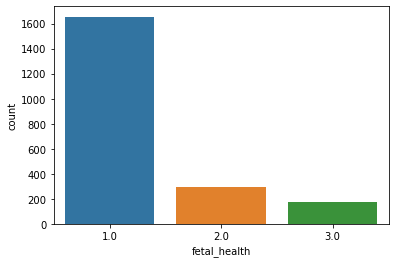

In [7]:
sns.countplot(data=df, x='fetal_health')

#fetal_health variavel a ser prevista, onde 1 = 

In [8]:
df['fetal_health'].value_counts(normalize=True)

1.0    0.778457
2.0    0.138758
3.0    0.082785
Name: fetal_health, dtype: float64

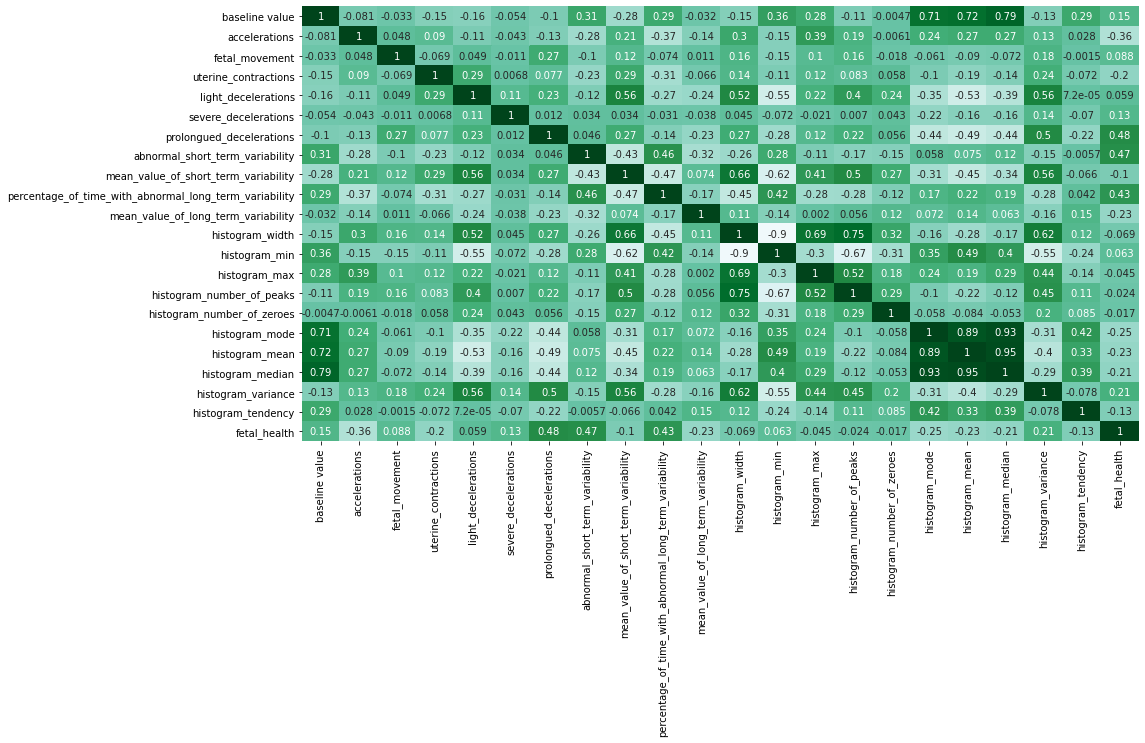

In [9]:
plt.figure(figsize=(15,8))
sns.heatmap(df.corr(),vmin=-1, vmax=1, center=0, annot=True,cmap='BuGn', cbar=False)

## Separando em treino e teste

In [10]:
from sklearn.model_selection import train_test_split

In [11]:
X = df.drop('fetal_health', axis=1)
y = df['fetal_health']

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [13]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

### Logistic Regression

In [20]:
lr = LogisticRegression(max_iter=15000)
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)

In [21]:
from sklearn.metrics import classification_report, confusion_matrix

In [22]:
print("\nreport de classificação:")
print(classification_report(y_pred, y_test))
print("\nmatriz de confusao:")
print(confusion_matrix(y_pred,y_test))


report de classificação:
              precision    recall  f1-score   support

         1.0       0.95      0.94      0.95       559
         2.0       0.60      0.71      0.65        87
         3.0       0.87      0.70      0.77        56

    accuracy                           0.89       702
   macro avg       0.81      0.78      0.79       702
weighted avg       0.90      0.89      0.90       702


matriz de confusao:
[[527  31   1]
 [ 20  62   5]
 [  7  10  39]]


### RandomForest

In [23]:
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)

In [24]:
print("\nreport de classificação:")
print(classification_report(y_pred, y_test))
print("\nmatriz de confusao:")
print(confusion_matrix(y_pred,y_test, normalize='true'))


report de classificação:
              precision    recall  f1-score   support

         1.0       0.98      0.96      0.97       566
         2.0       0.75      0.89      0.81        87
         3.0       0.93      0.86      0.89        49

    accuracy                           0.94       702
   macro avg       0.89      0.90      0.89       702
weighted avg       0.95      0.94      0.94       702


matriz de confusao:
[[0.95583039 0.04063604 0.00353357]
 [0.10344828 0.88505747 0.01149425]
 [0.08163265 0.06122449 0.85714286]]
